# TP Semana 6
  
Para el siguiente cuadripolo se pide calcular los parámetros Z.  <p style="text-align: center;">      
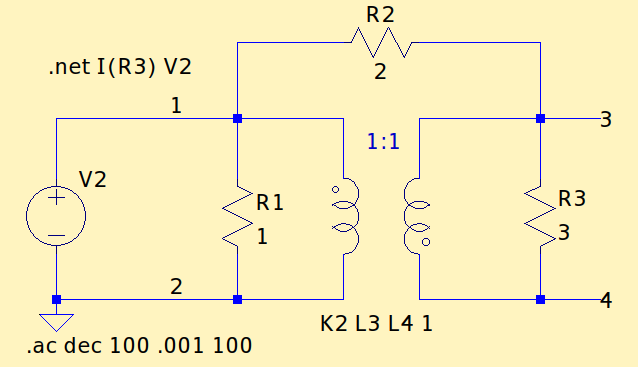  
Bonus:  
  
    +1 💎 Simular en SPICE los parámetros de cuadripolo con la directiva .net
    +1 🎓 Verifique mediante el módulo de simulación simbólica SymPy la impedancia de entrada 
    +1 🤯 Presentación en jupyter notebook

<p style="text-align: center;">    
$Z_{11} = \frac{V_1}{I_1}|_{I_2=0}$      $Z_{12} = \frac{V_1}{I_2}|_{I_1=0}$  
    <p style="text-align: center;">    
$Z_{21} = \frac{V_2}{I_1}|_{I_2=0}$      $Z_{22} = \frac{V_2}{I_2}|_{I_1=0}$  

Se puede obserbar que el circuito que se plantea es un transformador ideal en paralelo a una red simil $\pi$ la cual llamare $s\pi$. Por lo tanto para resolver este ejercicio vamos a sumar las contribuciones de ambas admitancias para luego obtener la impedancia de la red:  
<p style="text-align: center;">    
$Z = (Y_{trafo} + Y_{s\pi})^{-1}$

$Y_{trafo}:$  <p style="text-align: center;">    
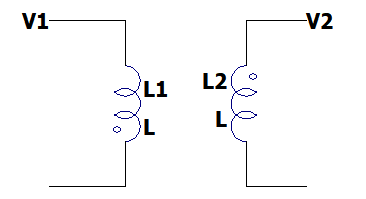

<p style="text-align: center;">    
$Y_{11} = \frac{I_1}{V_1}|_{V_2=0}$    $Y_{12} = \frac{I_1}{V_2}|_{V_1=0}$   

<p style="text-align: center;">    
$Y_{21} = \frac{I_2}{V_1}|_{V_2=0}$     $Y_{22} = \frac{I_2}{V_2}|_{V_1=0}$  

Siendo $M = k. \sqrt{L_1.L_2}$ obtenemos las siguientes admitancias:  
$Y_{11}= L_1.s$  
$Y_{22}= L_2.s$  
$Y_{12}= -M.s$  
$Y_{21}= -M.s$  
### Matriz $Y_{trafo}$
$$ Y =
\left(\begin{array}
 .L_1.s & -M.s\\
-M.s & L_2.s
\end{array}\right)
$$ 

$Y_{s\pi}:$  <p style="text-align: center;">    
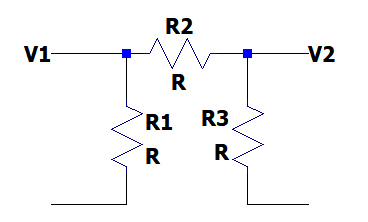

$Y_{11}= \frac{1}{R_1}$  
$Y_{22}= \frac{1}{R_3}$  
$Y_{12}= 0$  
$Y_{21}= 0$  
### Matriz $Y_{s\pi}$
$$ Y =
\left(\begin{array}
 .\frac{1}{R_1} & 0\\
0 & \frac{1}{R_3}
\end{array}\right)
$$ 

### Resumen de Admintacias:
$$ Y{\pi} =
\left(\begin{array}
 .1 & 0\\
0 & 0.33
\end{array}\right)
$$  
Supongo a $K = 1$, $M = k. \sqrt{L_1.L_2} = 1$
$$ Y{trafo} =
\left(\begin{array}
 .s & -s\\
-s & s
\end{array}\right)
$$ 

In [7]:
from pytc2.general import print_subtitle
import sympy as sp
R1 = 1
R2 = 2
R3 = 3
L1 = 1
L2 = 1
k = 1
M = k*(L1*L2)**(1/2)
s = sp.symbols('s',complex=True)

Yspi = sp.Matrix([[1/R1,0],[0,1/R3]])
Ytrafo = sp.Matrix([[L1*s,-M*s],[-M*s,-L2*s]])

Y = Yspi + Ytrafo
print_subtitle('Admitancia:')
display(Y)
Z = Y**-1
print_subtitle('Impedancia:')
display(Z)




#### Admitancia:

Matrix([
[s + 1.0,                -1.0*s],
[ -1.0*s, 0.333333333333333 - s]])

#### Impedancia:

Matrix([
[(1.0*s - 0.333333333333333)/(2.0*s**2 + 0.666666666666667*s - 0.333333333333333),         -1.0*s/(2.0*s**2 + 0.666666666666667*s - 0.333333333333333)],
[                     -1.0*s/(2.0*s**2 + 0.666666666666667*s - 0.333333333333333), (-1.0*s - 1.0)/(2.0*s**2 + 0.666666666666667*s - 0.333333333333333)]])